# Demo: analysing sea ice thickness data from the Climate Data Store in xcube

First, we import some necessary libraries and configure some matplotlib display preferences.

In [1]:
# Imports
from xcube.core.store import new_data_store
import shapely.geometry
import IPython.display
import matplotlib.pyplot as plt

# Plot settings
%matplotlib inline
plt.rcParams["figure.figsize"] = 16,12

Create a CDS data store object. The optional `normalize_names` parameter specifies that variable names in returned data cubes will be converted to legal Python identifiers, if required.

In [2]:
cds_store = new_data_store('cds', normalize_names=True)

From the data store we request monthly averages of sea ice thickness data from January 2005 to May 2006.

In [3]:
generated_cube = cds_store.open_data(
    'satellite-sea-ice-thickness:envisat',
    time_range=['2005-10-01', '2006-05-31']
)
cube = generated_cube

xcube-cds version 0.9.3-dev.0
2023-05-05 14:27:45,507 INFO Welcome to the CDS
2023-05-05 14:27:45,508 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/satellite-sea-ice-thickness
2023-05-05 14:27:45,596 INFO Request is completed
2023-05-05 14:27:45,597 INFO Downloading https://download-0003-clone.copernicus-climate.eu/cache-compute-0003/cache/data4/dataset-satellite-sea-ice-thickness-a6e587e1-7362-426e-a574-b2dcb7f9be31.tar.gz to /tmp/tmp6jxpyt64/tmp7ifx1j4i/data (29.5M)
2023-05-05 14:27:51,069 INFO Download rate 5.4M/s                               


Plot the bounding box on a map to check that the cube covers the expected area.

In [4]:
bbox = [float(cube.geospatial_lon_min), float(cube.geospatial_lat_min), float(cube.geospatial_lon_max), float(cube.geospatial_lat_max)]
IPython.display.GeoJSON(shapely.geometry.box(*bbox).__geo_interface__)

<IPython.display.GeoJSON object>

Plot the differences between successive time points in the dataset. We can see that the times are monotonically increasing (all the difference values are positive), but not equally spaced, since months are not all of the same length and sea ice data is not recorded from May to September (so we get a big jump in October).

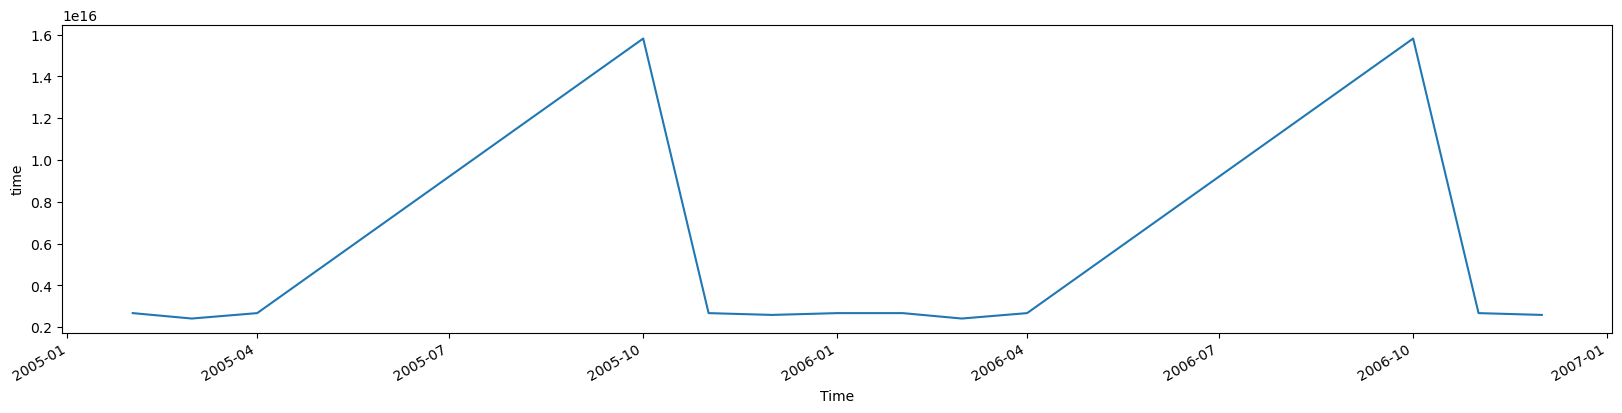

In [5]:
cube.time.diff(dim='time').plot.line(figsize=(20, 4))

As a quick initial test, we get the data for a time point in November 2005 and do a simple x/y point of the whole available area.

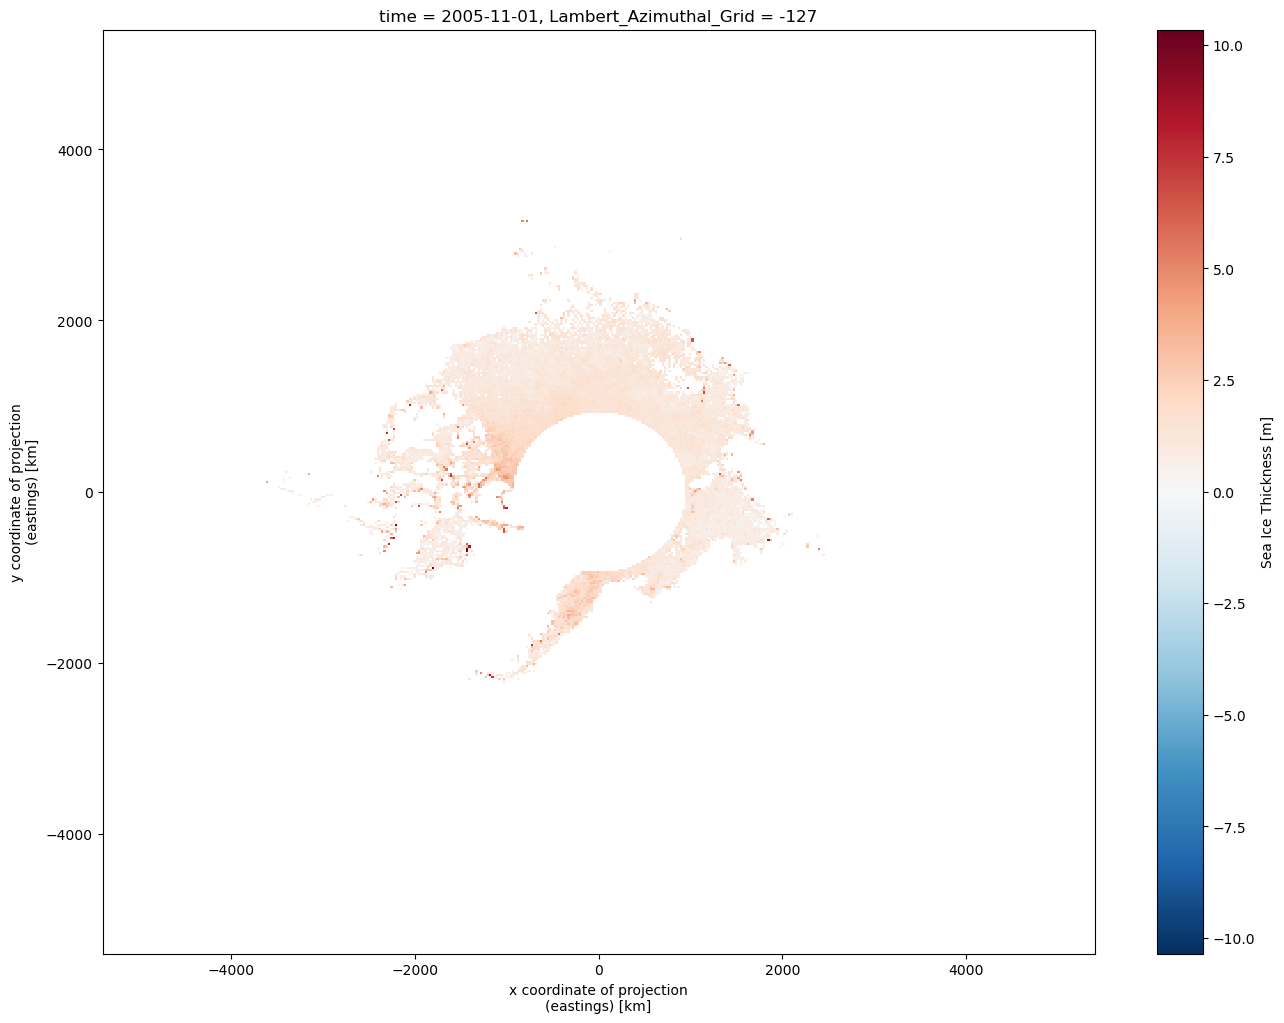

In [6]:
sit_2005_nov = cube.sea_ice_thickness.sel(time='2005-11-01 00:00:00', method='nearest')
sit_2005_nov.plot.imshow()

Now we define a plotting function which restricts the plotted area.

In [7]:
def plot_map(data_array, colour_scale=(None, None), cmap=None):
    data_array[125:300, 125:300].plot.imshow(vmin=colour_scale[0], vmax=colour_scale[1], figsize=(14,12), cmap=cmap)

common_scale = (260, 300)

First we plot the sea ice thickness for 1 November 2005. We use an inverted version of the matplotlib ‘viridis’ colour map ranging from yellow (thinnest) to dark blue (thickest). 

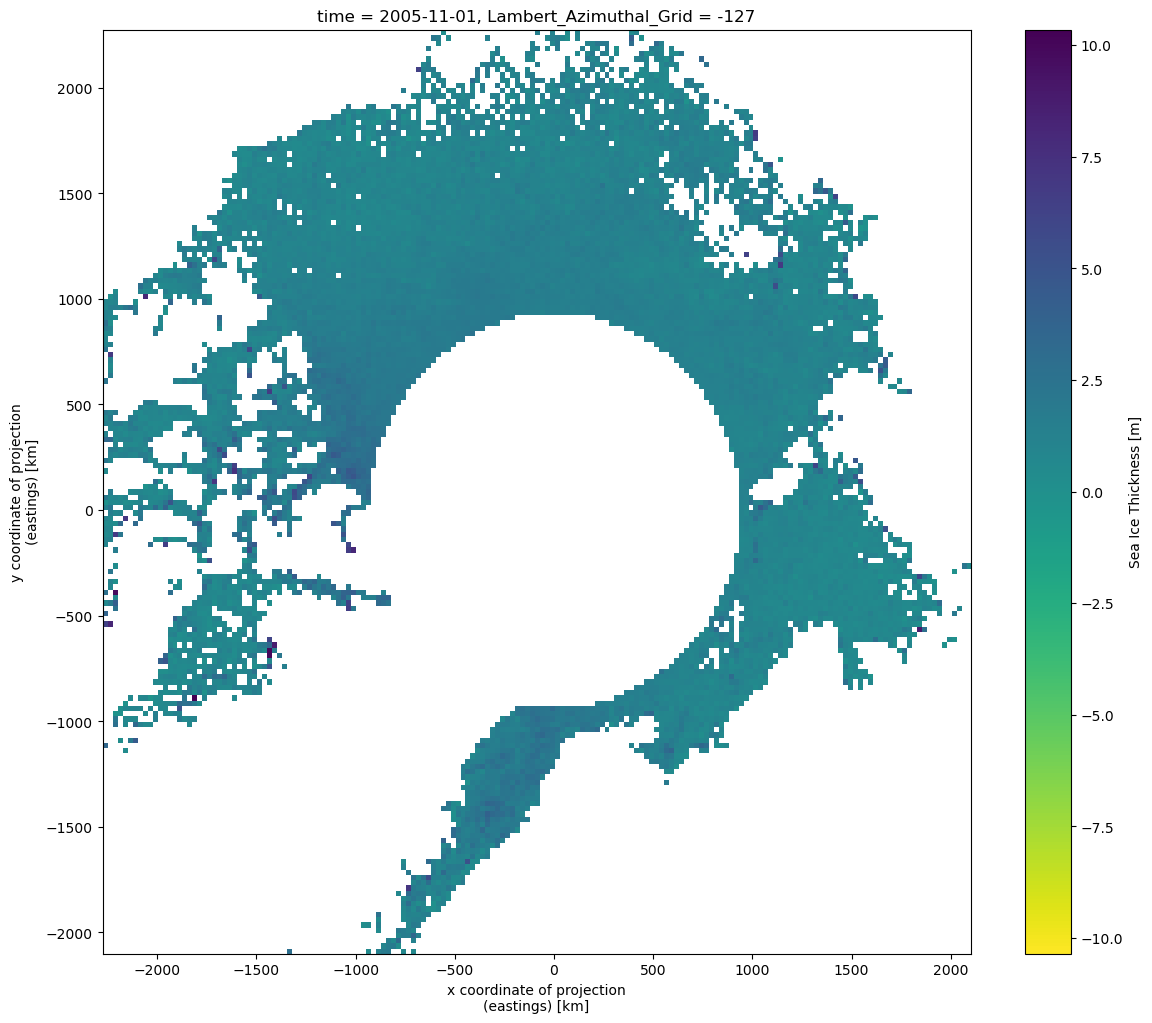

In [8]:
plot_map(sit_2005_nov, cmap='viridis_r')

For comparison, we plot the data for May 2005. Note the overall lower thickness.

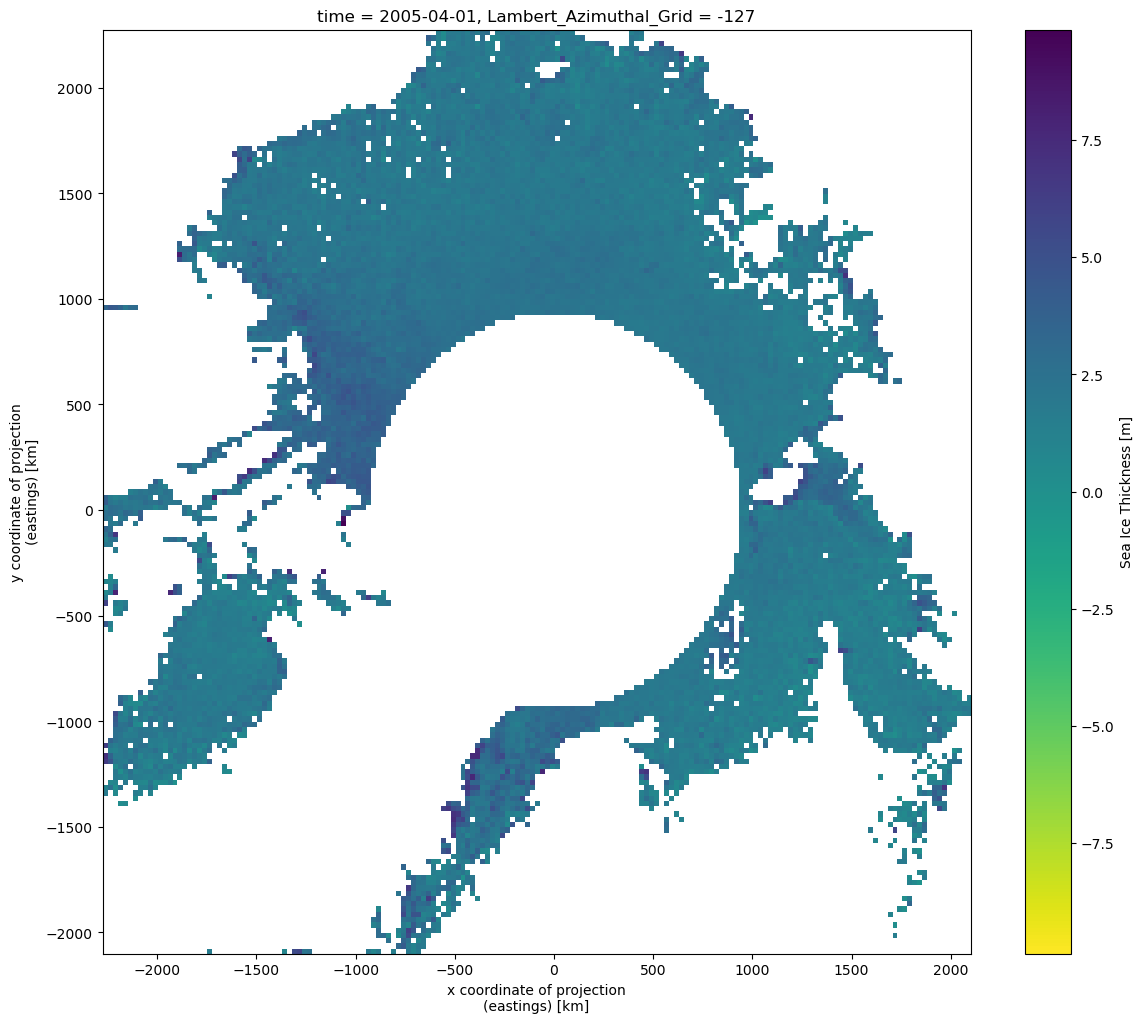

In [9]:
sit_2006_may = cube.sea_ice_thickness.sel(time='2005-05-15 00:00:00', method='nearest')
plot_map(sit_2006_may, cmap='viridis_r')

By subtracting the November data from the May data, we can see more clearly where the thickness varies the most.

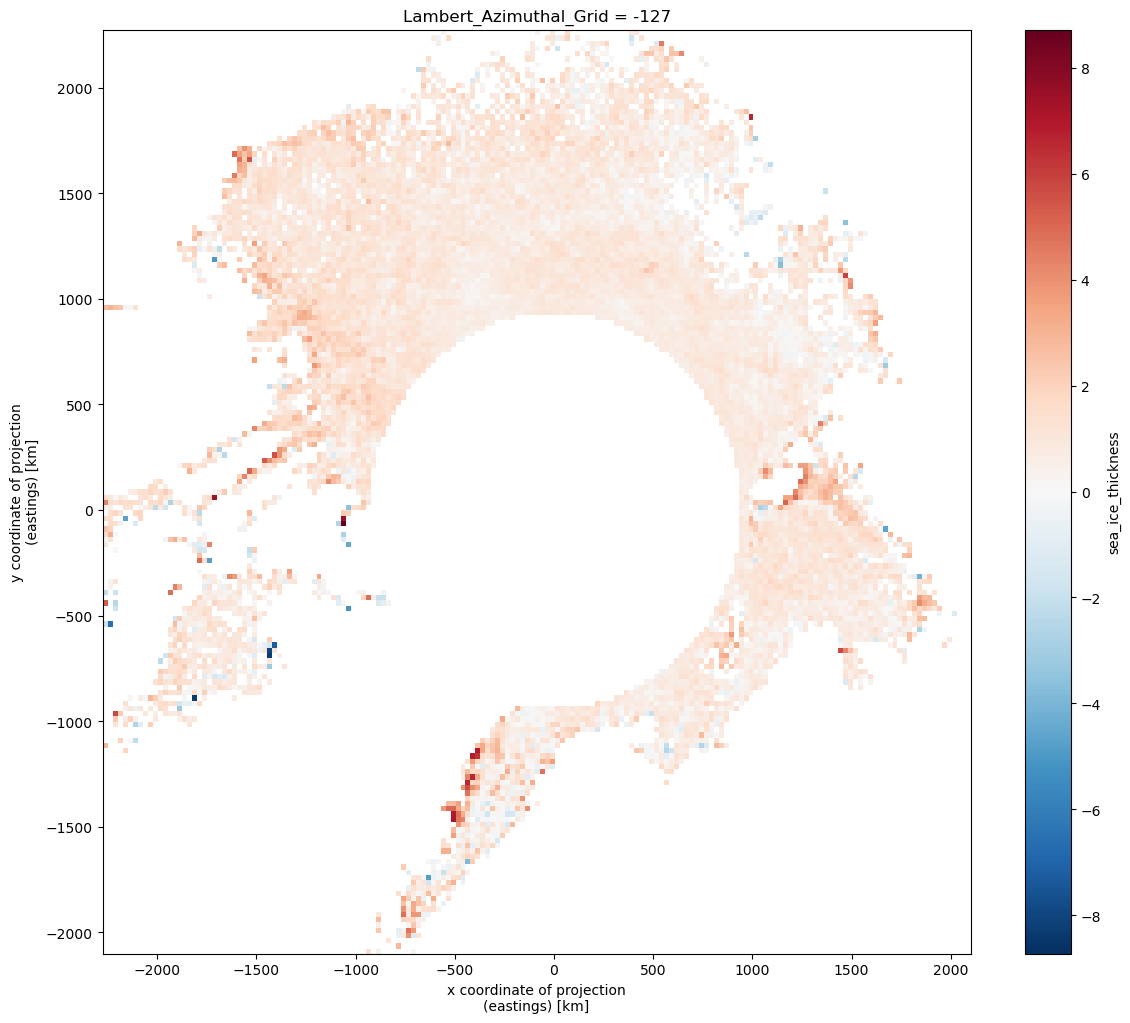

In [10]:
plot_map(sit_2006_may - sit_2005_nov)